In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import glob
import os
import kagglehub

path = kagglehub.dataset_download("currie32/crimes-in-chicago")


Using Colab cache for faster access to the 'crimes-in-chicago' dataset.


In [ ]:
all_files = glob.glob(os.path.join(path, "*.csv"))
df_list = [pd.read_csv(f, index_col=0, on_bad_lines='skip').sample(frac=0.1) for f in all_files]
df = pd.concat(df_list, axis=0, ignore_index=True)

/tmp/ipython-input-1142770998.py:2: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f, index_col=0, on_bad_lines='skip').sample(frac=0.1) for f in all_files]


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,08B,1167328.0,1936340.0,2009.0,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,20,1179405.0,1869143.0,2009.0,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,07,1151463.0,1908587.0,2010.0,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,06,1153515.0,1901177.0,2009.0,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,26,1172288.0,1854297.0,2008.0,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794123,8090934,HT324398,2006-04-01 08:00:00,031XX S GREEN ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,06,NaN,NaN,2006.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN,8,Saturday
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,06,1175696.0,1895352.0,2006.0,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,18,1139386.0,1904475.0,2005.0,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,14,1196152.0,1847467.0,2007.0,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794123,8090934,HT324398,2006-04-01 08:00:00,031XX S GREEN ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,08/17/2015 03:03:40 PM,NaN,NaN,NaN,8,Saturday,1,Morning,Spring,0
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0


/tmp/ipython-input-1767861615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='Hour', palette='viridis')


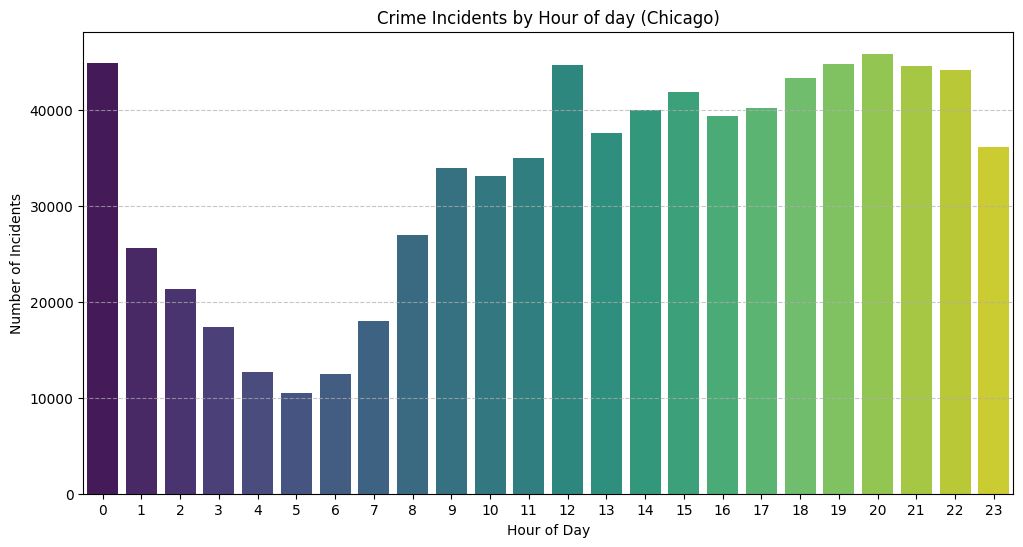

/tmp/ipython-input-1767861615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='Hour', palette='viridis')


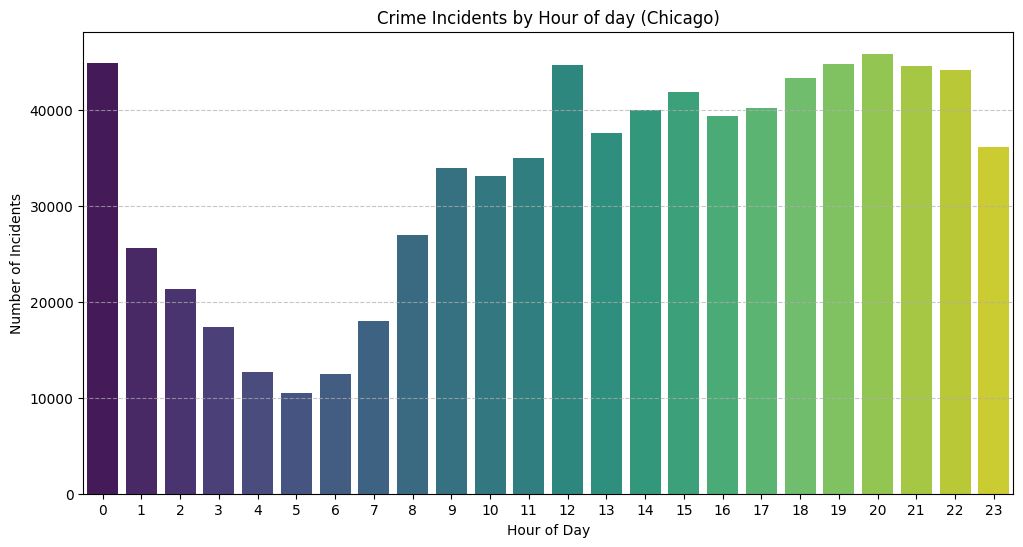

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x='Hour', palette='viridis')
plt.title('Crime Incidents by Hour of day (Chicago)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.isna().count()

,0
ID,794128
Case Number,794128
Date,794128
Block,794128
IUCR,794128
Primary Type,794128
Description,794128
Location Description,794128
Arrest,794128
Domestic,794128


,0
ID,794128
Case Number,794128
Date,794128
Block,794128
IUCR,794128
Primary Type,794128
Description,794128
Location Description,794128
Arrest,794128
Domestic,794128


In [ ]:
df_geo=df.dropna(subset=['Latitude', 'Longitude'])
df_geo.isna().count()

,0
ID,783605
Case Number,783605
Date,783605
Block,783605
IUCR,783605
Primary Type,783605
Description,783605
Location Description,783605
Arrest,783605
Domestic,783605


,0
ID,783605
Case Number,783605
Date,783605
Block,783605
IUCR,783605
Primary Type,783605
Description,783605
Location Description,783605
Arrest,783605
Domestic,783605


In [ ]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)
m

In [ ]:
heat_data = df_geo[['Latitude', 'Longitude']].sample(5000).values.tolist()
HeatMap(heat_data).add_to(m)

In [ ]:
m.save('Chicago_crime_heatmap.html')
print("Heatmap saved as 'chicago_crime_heatmap.html'")

Heatmap saved as 'chicago_crime_heatmap.html'
Heatmap saved as 'chicago_crime_heatmap.html'


In [ ]:
friday_10pm = df[(df['DayOfWeek'] == 'Friday')& (df['Hour'] == 22)]
sector_counts = friday_10pm['District'].value_counts().head(5)
print("Top 5 districts for Crime on Friday at 10:00 PM")
print(sector_counts)

Top 5 districts for Crime on Friday at 10:00 PM
District
8.0     506
25.0    461
11.0    444
9.0     412
7.0     407
Name: count, dtype: int64
Top 5 districts for Crime on Friday at 10:00 PM
District
8.0     506
25.0    461
11.0    444
9.0     412
7.0     407
Name: count, dtype: int64


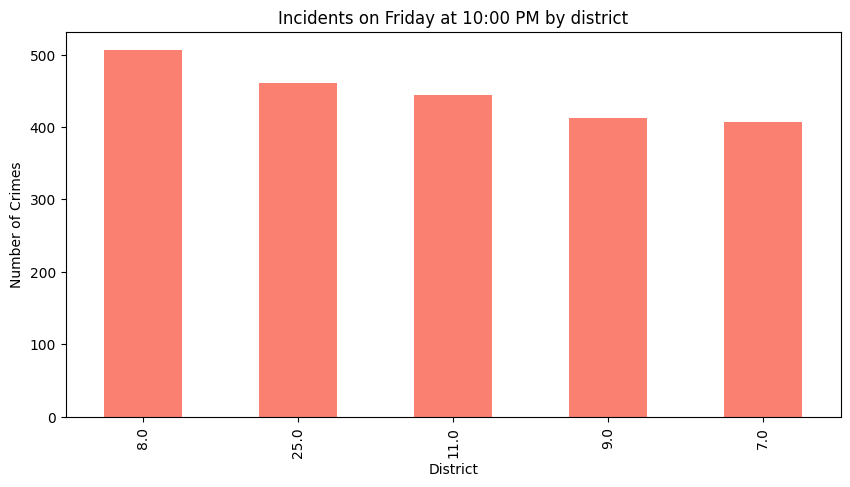

In [ ]:
plt.figure(figsize=(10,5))
sector_counts.plot(kind='bar', color='salmon')
plt.title('Incidents on Friday at 10:00 PM by district')
plt.ylabel('Number of Crimes')
plt.show()

In [ ]:
heatmap_data = df.pivot_table(values= 'ID', index='DayOfWeek', columns='Hour', aggfunc='count')
days =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days)

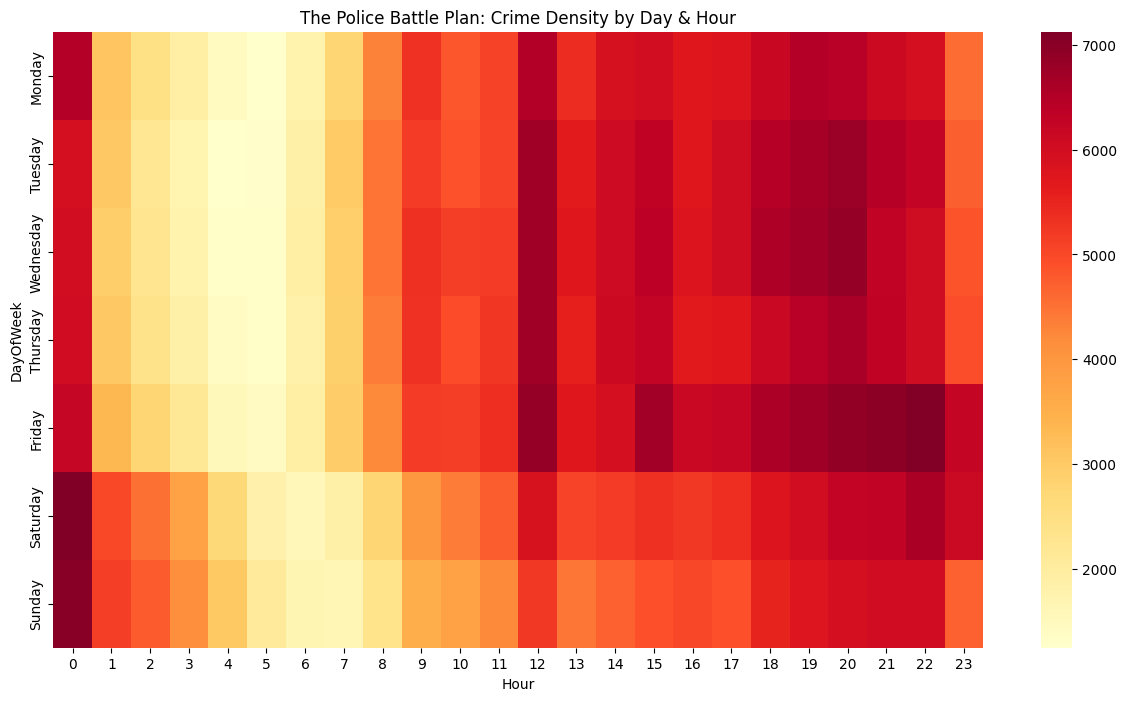

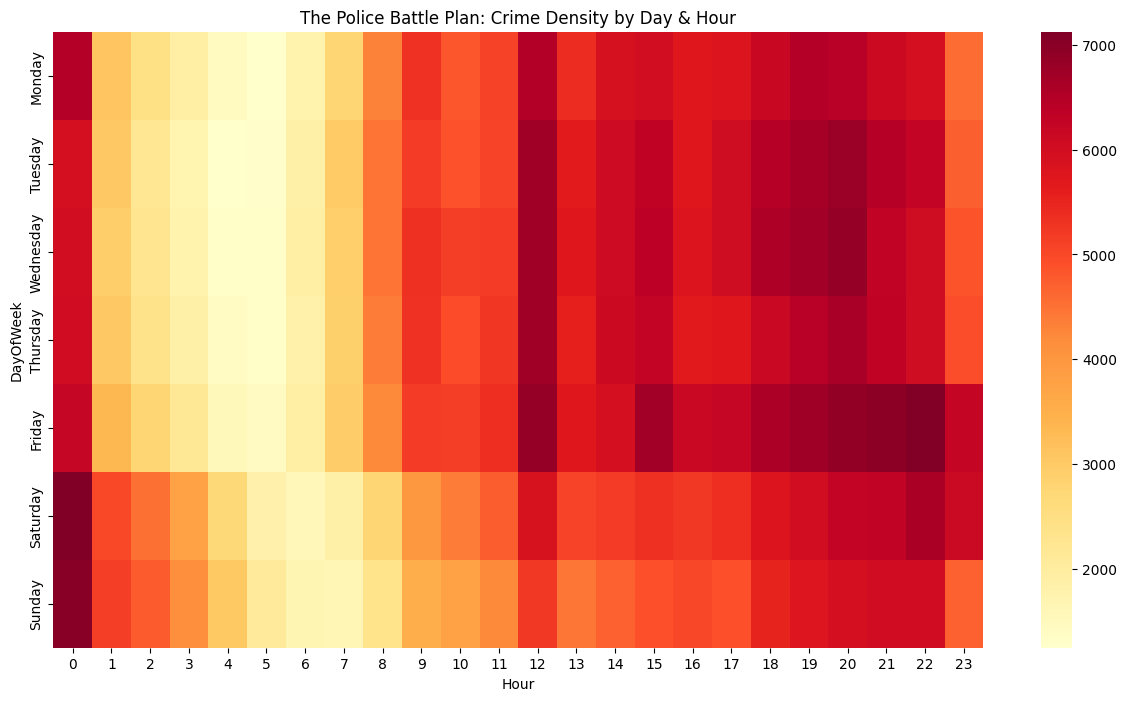

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False)
plt.title('The Police Battle Plan: Crime Density by Day & Hour')
plt.show()

In [ ]:
def get_deployment_plan(day, hour):
  subset = df[(df['DayOfWeek'] == day) & (df['Hour'] == hour)]
  top_districts = subset['District'].value_counts().head(3)
  main_crime = subset['Primary Type'].mode()[0]
  return {
      "Time Slot": f"{day} at {hour}:00",
      "Priority Districts": top_districts.index.tolist(),
      "Main Crime": main_crime,
      "Recommanded Action": f"Deploy {main_crime} Task Force to Districts {top_districts.index.tolist()}"
  }


In [ ]:
print(get_deployment_plan("Friday", 22))

{'Time Slot': 'Friday at 22:00', 'Priority Districts': [8.0, 25.0, 11.0], 'Main Crime': 'BATTERY', 'Recommanded Action': 'Deploy BATTERY Task Force to Districts [8.0, 25.0, 11.0]'}
{'Time Slot': 'Friday at 22:00', 'Priority Districts': [8.0, 25.0, 11.0], 'Main Crime': 'BATTERY', 'Recommanded Action': 'Deploy BATTERY Task Force to Districts [8.0, 25.0, 11.0]'}


In [ ]:
df['Is_Weekend'] = df['Date'].dt.dayofweek.apply(lambda x: 1 if x>= 5 else 0)

In [ ]:
def get_part_of_day(hour):
  if 5 <= hour < 12:
    return 'Morning'
  elif 12<= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'


In [ ]:
df['Part_of_Day'] = df['Date'].dt.hour.apply(get_part_of_day)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,1936340.0,2009.0,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,1869143.0,2009.0,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1908587.0,2010.0,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,1901177.0,2009.0,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,1854297.0,2008.0,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794123,8090934,HT324398,2006-04-01 08:00:00,031XX S GREEN ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,NaN,2006.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN,8,Saturday,1,Morning
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,1895352.0,2006.0,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,1904475.0,2005.0,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1847467.0,2007.0,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794123,8090934,HT324398,2006-04-01 08:00:00,031XX S GREEN ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,08/17/2015 03:03:40 PM,NaN,NaN,NaN,8,Saturday,1,Morning,Spring,0
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0


In [ ]:
def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Autumn'
df['Season'] = df['Date'].dt.month.apply(get_season)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,2009.0,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,2009.0,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,2010.0,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,2009.0,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,2008.0,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794123,8090934,HT324398,2006-04-01 08:00:00,031XX S GREEN ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,2006.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN,8,Saturday,1,Morning,Spring
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,2006.0,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,2005.0,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,2007.0,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794123,8090934,HT324398,2006-04-01 08:00:00,031XX S GREEN ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,08/17/2015 03:03:40 PM,NaN,NaN,NaN,8,Saturday,1,Morning,Spring,0
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [ ]:
cal = calendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())
df['Is_Holiday'] = df['Date'].dt.date.astype('datetime64[ns]').isin(holidays).astype(int)


In [ ]:
df[df['Is_Holiday'] == 1]['Primary Type'].value_counts()

,count
Primary Type,
THEFT,4198
BATTERY,4017
CRIMINAL DAMAGE,2479
NARCOTICS,2098
OTHER OFFENSE,1362
BURGLARY,1209
ASSAULT,1111
MOTOR VEHICLE THEFT,972
ROBBERY,706


,count
Primary Type,
THEFT,4198
BATTERY,4017
CRIMINAL DAMAGE,2479
NARCOTICS,2098
OTHER OFFENSE,1362
BURGLARY,1209
ASSAULT,1111
MOTOR VEHICLE THEFT,972
ROBBERY,706


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
df_geo = df.dropna(subset=['Latitude', 'Longitude']).copy()
df_geo

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794122,4767756,HM380954,2006-05-29 19:10:00,050XX W ALTGELD ST,0560,ASSAULT,SIMPLE,ALLEY,False,True,...,04/15/2016 08:55:02 AM,41.926021,-87.752107,"(41.926021074, -87.75210655)",19,Monday,0,Evening,Spring,1
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,02/04/2016 06:33:39 AM,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,02/04/2016 06:33:39 AM,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,02/04/2016 06:33:39 AM,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,02/04/2016 06:33:39 AM,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,02/04/2016 06:33:39 AM,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794122,4767756,HM380954,2006-05-29 19:10:00,050XX W ALTGELD ST,0560,ASSAULT,SIMPLE,ALLEY,False,True,...,04/15/2016 08:55:02 AM,41.926021,-87.752107,"(41.926021074, -87.75210655)",19,Monday,0,Evening,Spring,1
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,04/15/2016 08:55:02 AM,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,04/15/2016 08:55:02 AM,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,04/15/2016 08:55:02 AM,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0


In [ ]:
geometry = [Point(xy) for xy in zip (df_geo['Longitude'], df_geo['Latitude'])]
gdf = gpd.GeoDataFrame(df_geo, geometry=geometry, crs='EPSG:4326')
gdf

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday,geometry
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0,POINT (-87.65999 41.98087)
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0,POINT (-87.61764 41.79621)
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0,POINT (-87.71907 41.90505)
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0,POINT (-87.71173 41.88467)
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0,POINT (-87.64417 41.75563)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794122,4767756,HM380954,2006-05-29 19:10:00,050XX W ALTGELD ST,0560,ASSAULT,SIMPLE,ALLEY,False,True,...,41.926021,-87.752107,"(41.926021074, -87.75210655)",19,Monday,0,Evening,Spring,1,POINT (-87.75211 41.92602)
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0,POINT (-87.63045 41.86822)
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0,POINT (-87.76353 41.89399)
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0,POINT (-87.55694 41.73633)


In [ ]:
gdf = gdf.to_crs(epsg=3435)
gdf

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday,geometry
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,41.980874,-87.659992,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0,POINT (1167328 1936340)
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,41.796213,-87.617639,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0,POINT (1179405 1869143)
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,41.905045,-87.719070,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0,POINT (1151463 1908587)
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,41.884671,-87.711729,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0,POINT (1153515 1901177)
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,41.755634,-87.644173,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0,POINT (1172288 1854297)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794122,4767756,HM380954,2006-05-29 19:10:00,050XX W ALTGELD ST,0560,ASSAULT,SIMPLE,ALLEY,False,True,...,41.926021,-87.752107,"(41.926021074, -87.75210655)",19,Monday,0,Evening,Spring,1,POINT (1142418 1916168)
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,41.868217,-87.630453,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0,POINT (1175696 1895352)
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,41.89399,-87.763533,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0,POINT (1139386 1904475)
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,41.736334,-87.556945,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0,POINT (1196152 1847467)


In [ ]:
city_center_raw = Point(-87.6325, 41.8832)
center_point = gpd.GeoSeries([city_center_raw], crs="EPSG:4326").to_crs(epsg=3435).iloc[0]

In [ ]:
gdf['Distance_to_Center'] = gdf.geometry.distance(center_point)
gdf['Distance_KM']=gdf['Distance_to_Center']-0.0003048

In [ ]:
gdf

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Hour,DayOfWeek,Is_Weekend,Part_of_Day,Season,Is_Holiday,geometry,Distance_to_Center,Distance_KM
0,6701386,HR115485,2009-01-10 18:45:00,054XX N BROADWAY,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,"(41.980874051, -87.659992014)",18,Saturday,1,Evening,Winter,0,POINT (1167328 1936340),36371.452244,36371.451939
1,7183142,HR591621,2009-10-16 13:45:00,054XX S CALUMET AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,"(41.796213241, -87.617638522)",13,Friday,0,Afternoon,Autumn,0,POINT (1179405 1869143),31956.424671,31956.424366
2,7423515,HS225653,2010-03-25 15:00:00,013XX N LAWNDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,"(41.90504507, -87.719069808)",15,Thursday,0,Afternoon,Spring,0,POINT (1151463 1908587),24878.589169,24878.588864
3,7062434,HR467675,2009-08-04 14:30:00,034XX W LAKE ST,0870,THEFT,POCKET-PICKING,SIDEWALK,False,False,...,"(41.884670744, -87.711729333)",14,Tuesday,0,Afternoon,Summer,0,POINT (1153515 1901177),21582.087540,21582.087236
4,6373595,HP457801,2008-07-17 11:25:00,076XX S HALSTED ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,"(41.755633717, -87.644173224)",11,Thursday,0,Morning,Summer,0,POINT (1172288 1854297),46594.859028,46594.858723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794122,4767756,HM380954,2006-05-29 19:10:00,050XX W ALTGELD ST,0560,ASSAULT,SIMPLE,ALLEY,False,True,...,"(41.926021074, -87.75210655)",19,Monday,0,Evening,Spring,1,POINT (1142418 1916168),36106.329196,36106.328891
794124,4626405,HM197264,2006-02-23 19:04:33,011XX S CLARK ST,0870,THEFT,POCKET-PICKING,DEPARTMENT STORE,False,False,...,"(41.86821682, -87.6304532)",19,Thursday,0,Evening,Winter,0,POINT (1175696 1895352),5488.420529,5488.420224
794125,3987131,HL267046,2005-03-31 22:19:36,007XX N PINE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,"(41.893989989, -87.763533263)",22,Thursday,0,Night,Spring,0,POINT (1139386 1904475),35895.788762,35895.788457
794126,5740075,HN547688,2007-08-24 14:15:00,087XX S MANISTEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,"(41.736333808, -87.556944702)",14,Friday,0,Afternoon,Summer,0,POINT (1196152 1847467),57346.577282,57346.576977


In [ ]:
violent_crimes = ['HOMICIDE', 'ROBBERY', 'ASSUALT', 'BATTERY','CRIM SEXUAL ASSAULT']
gdf['Is_Violent'] = gdf['Primary Type'].apply(lambda x: 'Violent' if x in violent_crimes else 'Non-Violent')


In [ ]:
gdf['Is_Violent'].value_counts()

,count
Is_Violent,
Non-Violent,606921
Violent,176684


In [ ]:
analysis = gdf.groupby('Is_Violent')['Distance_KM'].mean()
print("Average Distance from City Center:")
print(analysis)

Average Distance from City Center:
Is_Violent
Non-Violent    35527.586779
Violent        37485.855289
Name: Distance_KM, dtype: float64


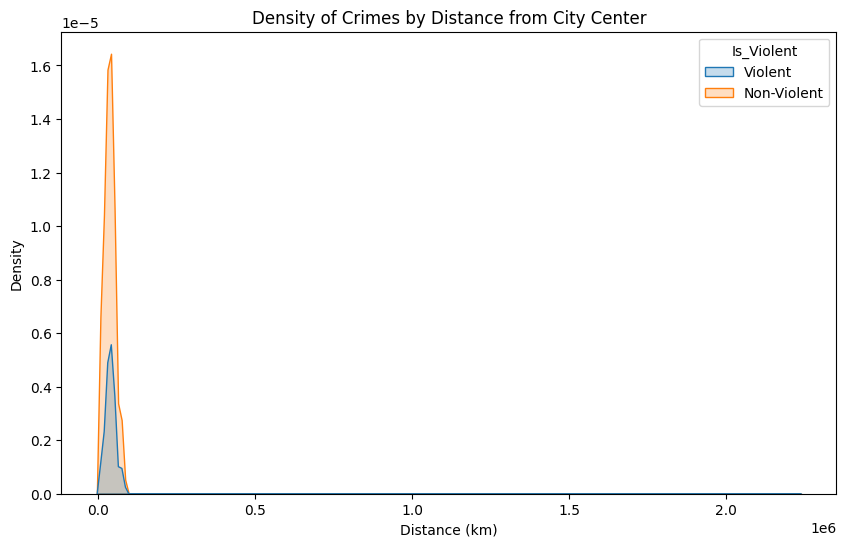

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=gdf, x='Distance_KM', hue='Is_Violent', fill=True)
plt.title('Density of Crimes by Distance from City Center')
plt.xlabel('Distance (km)')
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
city_hall = [41.8832, -876325]
m=folium.Map(location=city_hall, zoom_start=11, tiles='CartoDB positron')

In [ ]:
distances = [2000, 5000, 10000]
colors = ['green', 'orange', 'red']

In [ ]:
for dist, color in zip(distances, colors):
  folium.Circle(
      location=city_hall,
      radius=dist,
      color=color,
      fill=True,
      fill_color=0.1,
      popup=f'{dist/1000}km from Center'
  ).add_to(m)

In [ ]:
sample_df = gdf.sample(1000)

In [ ]:
for idx, row in sample_df.iterrows():
  color = 'red' if row['Is_Violent'] == 'Violent' else 'blue'
  folium.CircleMarker(
      location=[row['Latitude'], row['Longitude']],
      radius=3,
      color=color,
      fill = True,
      fill_color=color,
      fill_opacity=0.7,
      popup=f"Type: {row['Primary Type']}<br>Dist: {row['Distance_KM']:.2f} km"
  ).add_to(m)

In [ ]:
folium.Marker(
    location=city_hall,
    icon=folium.Icon(color='black', icon='star'),
    popup='CITY CENTER/COMMAND POST'
).add_to(m)
m.save("spatial_analysis.html")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
features = ['Hour', 'Is_Weekend', 'Part_of_Day', 'Season', 'Is_Holiday', 'District', 'Distance_KM']
target = 'Primary Type'
df_ml = gdf[features +[target]+ ['Date']].dropna()


In [ ]:
encoders = {}
for col in ['Part_of_Day', 'Season', 'Primary Type']:
  le = LabelEncoder()
  df_ml[col] = le.fit_transform(df_ml[col])
  encoders[col] = le

In [ ]:
df_ml

,Hour,Is_Weekend,Part_of_Day,Season,Is_Holiday,District,Distance_KM,Primary Type,Date
0,18,1,1,3,0,20.0,36371.451939,2,2009-01-10 18:45:00
1,13,0,0,0,0,2.0,31956.424366,22,2009-10-16 13:45:00
2,15,0,0,1,0,25.0,24878.588864,16,2010-03-25 15:00:00
3,14,0,0,2,0,11.0,21582.087236,31,2009-08-04 14:30:00
4,11,0,2,2,0,6.0,46594.858723,7,2008-07-17 11:25:00
...,...,...,...,...,...,...,...,...,...
794122,19,0,1,1,1,25.0,36106.328891,1,2006-05-29 19:10:00
794124,19,0,1,3,0,1.0,5488.420224,31,2006-02-23 19:04:33
794125,22,0,3,1,0,15.0,35895.788457,17,2005-03-31 22:19:36
794126,14,0,0,2,0,4.0,57346.576977,6,2007-08-24 14:15:00


In [ ]:
df_ml['Year'] = df_ml['Date'].dt.year
train_df = df_ml[(df_ml['Year']==2001) | (df_ml['Year']==2016)]
test_df = df_ml[df_ml['Year']==2016]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]
print(f"Training rows:{len(train_df)}, Testing rows:{len(test_df)}")

Training rows:81655, Testing rows:25168


In [ ]:
df['Year'].value_counts()

,count
Year,
2008.0,85222
2006.0,79440
2009.0,78254
2010.0,70238
2007.0,62217
2001.0,56820
2002.0,49114
2003.0,47699
2005.0,45577


In [ ]:
rf =RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
print("Training Model...")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Model Trained.")

Training Model...
Model Trained.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
present_classes = np.unique(np.concatenate((y_test, y_pred)))
target_names = encoders['Primary Type'].inverse_transform(present_classes)
print(classification_report(y_test, y_pred, labels=present_classes, target_names=target_names))


                                   precision    recall  f1-score   support

                            ARSON       0.00      0.00      0.00        52
                          ASSAULT       1.00      0.00      0.01      1879
                          BATTERY       0.25      0.64      0.36      4877
                         BURGLARY       1.00      0.01      0.01      1349
CONCEALED CARRY LICENSE VIOLATION       0.00      0.00      0.00         2
              CRIM SEXUAL ASSAULT       1.00      0.01      0.01       137
                  CRIMINAL DAMAGE       0.48      0.03      0.06      2997
                CRIMINAL TRESPASS       1.00      0.01      0.02       619
               DECEPTIVE PRACTICE       1.00      0.01      0.01      1344
                         GAMBLING       0.00      0.00      0.00        17
                         HOMICIDE       0.00      0.00      0.00        79
                HUMAN TRAFFICKING       0.00      0.00      0.00         2
 INTERFERENCE WITH PUBLI

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
importances = pd.DataFrame({'feature': features, 'importance':rf.feature_importances_})
print(importances.sort_values('importance', ascending = False))

       feature  importance
6  Distance_KM    0.422766
5     District    0.226513
0         Hour    0.168312
3       Season    0.067819
2  Part_of_Day    0.067279
1   Is_Weekend    0.030763
4   Is_Holiday    0.016549


In [ ]:
gdf['Distance_KM'] = gdf['Distance_to_Center'] * 0.0003048
gdf_clean = gdf.dropna(subset=['Distance_KM']).copy()
max_dist = gdf_clean['Distance_KM'].max()
print(f"Farthest crime is {max_dist:.2f} km away.")
gdf_clean['Distance_Bucket'] = pd.cut(gdf_clean['Distance_KM'], bins=[0,2,5,10,20, max_dist],labels=['0-2km (Core)', '2-5km (Inner)', '5-10km (Mid)', '10-20km (Outer)','20km+ (Fringe)'], include_lowest=True)
for bucket in gdf_clean['Distance_Bucket'].cat.categories:
  print(f"\n-- ZONE: {bucket} KM from Center")
  zone_data = gdf_clean[gdf_clean['Distance_Bucket'] == bucket]
  if not zone_data.empty:
    top_crimes = zone_data['Primary Type'].value_counts(normalize=True).head(3)*100
    for crime, percent in top_crimes.items():
      print(f"{crime}: {percent:.2f}%")
  else:
    print("No crimes in this zone.")

Farthest crime is 681.14 km away.

-- ZONE: 0-2km (Core) KM from Center
THEFT: 48.33%
DECEPTIVE PRACTICE: 9.71%
BATTERY: 9.55%

-- ZONE: 2-5km (Inner) KM from Center
THEFT: 31.05%
BATTERY: 14.29%
CRIMINAL DAMAGE: 11.33%

-- ZONE: 5-10km (Mid) KM from Center
THEFT: 18.94%
BATTERY: 18.43%
NARCOTICS: 14.87%

-- ZONE: 10-20km (Outer) KM from Center
BATTERY: 19.47%
THEFT: 17.60%
CRIMINAL DAMAGE: 12.67%

-- ZONE: 20km+ (Fringe) KM from Center
BATTERY: 20.12%
THEFT: 16.41%
CRIMINAL DAMAGE: 13.75%


In [ ]:
from math import radians, cos, sin, asin, sqrt

In [ ]:
def haversine(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * asin(sqrt(a))
  r = 6371
  return c*r

target_lat, target_lon = 41.8837, -87.6324
gdf['Latitude'] = pd.to_numeric(gdf['Latitude'], errors='coerce')
gdf['Longitude'] = pd.to_numeric(gdf['Longitude'], errors='coerce')
gdf = gdf.dropna(subset=['Latitude', 'Longitude'])

gdf['Dist_to_Target'] = gdf.apply(lambda row: haversine(row['Longitude'], row['Latitude'], target_lon, target_lat), axis=1)
print(gdf.groupby('Primary Type')['Dist_to_Target'].mean().sort_values())
gdf['Is_Night'] = gdf['Hour'].apply(lambda x: 1 if x >= 20 or x <=5 else 0)

theft_night_ratio = gdf[gdf['Primary Type'] == 'THEFT']['Is_Night'].mean()
print(f"Percentage of thefts at night : {theft_night_ratio: .2%}")

Primary Type
NON-CRIMINAL                          8.073116
PROSTITUTION                          9.251385
PUBLIC INDECENCY                      9.371153
OTHER NARCOTIC VIOLATION              9.463011
THEFT                                 9.716646
NON-CRIMINAL (SUBJECT SPECIFIED)      9.862225
CRIMINAL TRESPASS                     9.904669
DECEPTIVE PRACTICE                    9.913162
LIQUOR LAW VIOLATION                  9.919930
OBSCENITY                            10.302850
PUBLIC PEACE VIOLATION               10.731698
NARCOTICS                            10.855927
SEX OFFENSE                          11.002729
GAMBLING                             11.069085
HUMAN TRAFFICKING                    11.079497
INTERFERENCE WITH PUBLIC OFFICER     11.112088
ROBBERY                              11.222985
MOTOR VEHICLE THEFT                  11.284253
CRIM SEXUAL ASSAULT                  11.369515
BATTERY                              11.498363
INTIMIDATION                         11.502095


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({31: 17170, 2: 15705, 6: 9495, 17: 7132, 1: 5436, 24: 5190, 3: 4369, 16: 4258, 28: 3304, 8: 3074, 7: 2161, 32: 879, 25: 779, 22: 486, 27: 472, 29: 352, 5: 346, 15: 235, 10: 206, 0: 179, 12: 123, 14: 112, 9: 102, 30: 37, 13: 34, 21: 9, 19: 4, 23: 2, 11: 2, 4: 2})


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_res))

After SMOTE: Counter({24: 17170, 3: 17170, 8: 17170, 16: 17170, 2: 17170, 6: 17170, 31: 17170, 17: 17170, 1: 17170, 28: 17170, 7: 17170, 25: 17170, 22: 17170, 29: 17170, 27: 17170, 32: 17170, 15: 17170, 5: 17170, 9: 17170, 0: 17170, 12: 17170, 14: 17170, 10: 17170, 13: 17170, 30: 17170, 21: 17170, 23: 17170, 11: 17170, 19: 17170, 4: 17170})


In [ ]:
rf_balanced = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
rf_balanced.fit(x_train_res, y_train_res)


RandomForestClassifier(max_depth=12, random_state=42)

In [ ]:
y_pred_balanced = rf_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced, labels=present_classes, target_names=target_names))

                                   precision    recall  f1-score   support

                            ARSON       0.02      0.33      0.04        52
                          ASSAULT       0.24      0.09      0.13      1879
                          BATTERY       0.34      0.34      0.34      4877
                         BURGLARY       0.19      0.09      0.12      1349
CONCEALED CARRY LICENSE VIOLATION       0.00      0.50      0.01         2
              CRIM SEXUAL ASSAULT       0.05      0.22      0.08       137
                  CRIMINAL DAMAGE       0.44      0.12      0.18      2997
                CRIMINAL TRESPASS       0.12      0.10      0.11       619
               DECEPTIVE PRACTICE       0.22      0.17      0.19      1344
                         GAMBLING       0.01      0.59      0.02        17
                         HOMICIDE       0.05      0.34      0.09        79
                HUMAN TRAFFICKING       0.00      0.00      0.00         2
 INTERFERENCE WITH PUBLI

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
violent_pts = gdf[gdf['Is_Violent'] == 'Violent'].copy()
coords = np.vstack([violent_pts.geometry.x, violent_pts.geometry.y]).T
coords.shape

(176684, 2)

In [ ]:
coords

array([[1167328.00001013, 1158855.0000175 , 1143312.00003892, ...,
        1150032.99995405, 1163113.00003413, 1176577.99997749],
       [1936339.99996965, 1860474.00017363, 1926152.00002284, ...,
        1883069.00012187, 1891403.0000486 , 1859650.00015613]])

In [ ]:
db = DBSCAN(eps=500, min_samples=15).fit(coords)

In [ ]:
violent_pts['Cluster'] = db.labels_

In [ ]:
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f"Discovered {num_clusters} high-density violent crime hotspot")

Discovered 258 high-density violent crime hotspot


In [ ]:
m_hotspots = folium.Map(location=[41.8781, -87.6298], zoom_start=11, titles='CartoDB dark_matter')
hotspots_only = violent_pts[violent_pts['Cluster'] != -1]

for cluster_id in hotspots_only['Cluster'].unique():
  cluster_data = hotspots_only[hotspots_only['Cluster'] == cluster_id]

  center_lat = cluster_data['Latitude'].mean()
  center_lon = cluster_data['Longitude'].mean()

  folium.Circle(
      location=[center_lat, center_lon],
      radius=200,
      color='red',
      fill=True,
      popup=f"Hotspot #{cluster_id}<br>Incident: {len(cluster_data)}"
  ).add_to(m_hotspots)
m_hotspots.save("chicago_tactical_hotspots.html")

In [ ]:
severity_weights = {
    'HOMICIDE': 10,
    'CRIM SEXUAL ASSAULT': 10,
    'KIDNAPPING': 9,
    'ROBBERY': 7,
    'WEAPONS VIOLATION': 7,
    'ASSAULT': 5,
    'BATTERY': 5,
    'BURGLARY': 4,
    'MOTOR VEHICLE THEFT': 4,
    'NARCOTICS': 3,
    'THEFT': 2,
    'CRIMINAL DAMAGE': 2,
    'DECEPTIVE PRACTICE': 1,
    'PUBLIC PEACE VIOLATION': 1
}
severity_weights

{'HOMICIDE': 10,
 'CRIM SEXUAL ASSAULT': 10,
 'KIDNAPPING': 9,
 'ROBBERY': 7,
 'WEAPONS VIOLATION': 7,
 'ASSAULT': 5,
 'BATTERY': 5,
 'BURGLARY': 4,
 'MOTOR VEHICLE THEFT': 4,
 'NARCOTICS': 3,
 'THEFT': 2,
 'CRIMINAL DAMAGE': 2,
 'DECEPTIVE PRACTICE': 1,
 'PUBLIC PEACE VIOLATION': 1}

In [ ]:
gdf['Risk_Weight'] = gdf['Primary Type'].apply(lambda x: severity_weights.get(x,1))

In [ ]:
district_stats = gdf.groupby('District').agg({
    'ID': 'count',
    'Risk_Weight': 'sum'
}).rename(columns={'ID': 'Crime_Volume', 'Risk_Weight': 'Total_Risk_Score'})

In [ ]:
district_stats['Avg_Severity'] = district_stats['Total_Risk_Score']/district_stats['Crime_Volume']

In [ ]:
district_stats = district_stats.sort_values(by='Total_Risk_Score', ascending=False)

In [ ]:
district_stats

,Crime_Volume,Total_Risk_Score,Avg_Severity
District,,,
8.0,54266,171821,3.166274
11.0,49329,166959,3.384601
7.0,47170,166745,3.534980
6.0,45109,152744,3.386109
4.0,44967,150542,3.347833
25.0,46288,147777,3.192555
3.0,40116,135550,3.378951
9.0,39248,126827,3.231426
2.0,37271,121262,3.253522


In [ ]:
top_by_volume = district_stats.sort_values('Crime_Volume', ascending=False).head(3)
top_by_risk = district_stats.sort_values('Total_Risk_Score', ascending=False).head(3)
print("Top 3 districts by volume (Traditional View):")
print(top_by_volume[['Crime_Volume', 'Total_Risk_Score']])

Top 3 districts by volume (Traditional View):
          Crime_Volume  Total_Risk_Score
District                                
8.0              54266            171821
11.0             49329            166959
7.0              47170            166745


In [ ]:
print("\nTop 3 Districts by Risk:")
print(top_by_risk[['Total_Risk_Score', 'Crime_Volume', 'Avg_Severity']])



Top 3 Districts by Risk:
          Total_Risk_Score  Crime_Volume  Avg_Severity
District                                              
8.0                 171821         54266      3.166274
11.0                166959         49329      3.384601
7.0                 166745         47170      3.534980


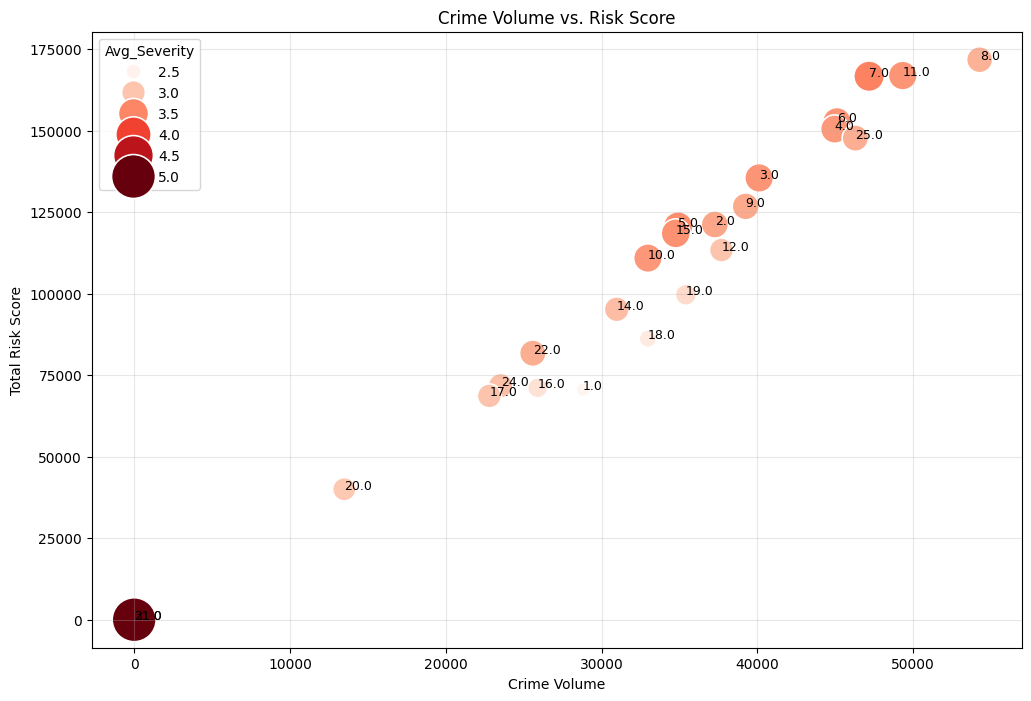

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=district_stats, x='Crime_Volume', y = 'Total_Risk_Score', size='Avg_Severity', sizes=(100,1000), hue='Avg_Severity', palette='Reds')
for district_id, row in district_stats.iterrows():
  plt.text(row['Crime_Volume']+5, row['Total_Risk_Score']+5, str(district_id), fontsize=9)
plt.title('Crime Volume vs. Risk Score')
plt.xlabel('Crime Volume')
plt.ylabel('Total Risk Score')
plt.grid(True, alpha=0.3)
plt.show()